In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Column specs taken from [here](https://www2.census.gov/programs-surveys/commuting/guidance/record-layouts/coxcoasc.txt)

In [4]:
cols=[(1,2),(4,6),(8,10),(12,15),(17,21),(23,25),(27,29),(31,33),(35,38),(40,44),(46,54),(56,85),(86,113)]

In [5]:
cols

[(1, 2),
 (4, 6),
 (8, 10),
 (12, 15),
 (17, 21),
 (23, 25),
 (27, 29),
 (31, 33),
 (35, 38),
 (40, 44),
 (46, 54),
 (56, 85),
 (86, 113)]

In [6]:
cols=list(map(lambda x:[x[0]-1,x[1]],cols))
# Need to convert from 1-indexing to 0-indexing

In [7]:
df=pd.read_fwf('usresco.txt',colspecs=cols,header=None)

The 3rd,5th,8th and 10th columns are empty except for a couple of specific states (Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont)  

Note: The FIPS codes (e.g. in 1st and second columns have been converted to integers '008' -> 8). 

In [8]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
221393,56,45,NaN,9999,NaN,56,25,NaN,1350,NaN,13,Weston County,Natrona County
221394,56,45,NaN,9999,NaN,56,27,NaN,9999,NaN,16,Weston County,Niobrara County
221395,56,45,NaN,9999,NaN,56,33,NaN,9999,NaN,4,Weston County,Sheridan County
221396,56,45,NaN,9999,NaN,56,37,NaN,9999,NaN,2,Weston County,Sweetwater County
221397,56,45,NaN,9999,NaN,56,45,NaN,9999,NaN,2617,Weston County,Weston County


In [9]:
names=['FIPS_state_res','FIPS_co_res','census_MCD_res',\
            'FIPS_MSA_res','FIPS_MCD_res','FIPS_state_work','FIPS_co_work',\
            'census_MCD_work','FIPS_MSA_work','FIPS_MCD_work','nWorkers',\
           'res_name','work_name']

In [10]:
df.columns=names

In [11]:
df.head()

,FIPS_state_res,FIPS_co_res,census_MCD_res,FIPS_MSA_res,FIPS_MCD_res,FIPS_state_work,FIPS_co_work,census_MCD_work,FIPS_MSA_work,FIPS_MCD_work,nWorkers,res_name,work_name
0,1,1,NaN,5240,NaN,1,1,NaN,5240,NaN,6855,Autauga County,Autauga County
1,1,1,NaN,5240,NaN,1,7,NaN,9999,NaN,17,Autauga County,Bibb County
2,1,1,NaN,5240,NaN,1,11,NaN,9999,NaN,5,Autauga County,Bullock County
3,1,1,NaN,5240,NaN,1,21,NaN,9999,NaN,242,Autauga County,Chilton County
4,1,1,NaN,5240,NaN,1,41,NaN,9999,NaN,16,Autauga County,Crenshaw County


In [12]:
#mapDict={'AL':1, 'AK':2,'AZ':4,'AR':5,'CA':6,'CO':8,'CT':9}

In [13]:
mapDict= {1:'AL', 2:'AK', 4:'AZ', 5:'AR', 6:'CA', 8:'CO', 9:'CT', 10:'DE', 11:'DC', 12:'FL', 13:'GA', 15:'HI', 16:'ID', 17:'IL', 18:'IN', 19:'IA', 20:'KS', 21:'KY', 22:'LA', 23:'ME', 24:'MD', 25:'MA', 26:'MI', 27:'MN', 28:'MS', 29:'MO', 30:'MT', 31:'NE', 32:'NV', 33:'NH', 34:'NJ', 35:'NM', 36:'NY', 37:'NC', 38:'ND', 39:'OH', 40:'OK', 41:'OR', 42:'PA', 44:'RI', 45:'SC', 46:'SD', 47:'TN', 48:'TX', 49:'UT', 50:'VT', 51:'VA', 53:'WA', 54:'WV', 55:'WI', 56:'WY'}

In [14]:
df['State'] = df['FIPS_state_res'].map(mapDict)

In [15]:
df.head()

,FIPS_state_res,FIPS_co_res,census_MCD_res,FIPS_MSA_res,FIPS_MCD_res,FIPS_state_work,FIPS_co_work,census_MCD_work,FIPS_MSA_work,FIPS_MCD_work,nWorkers,res_name,work_name,State
0,1,1,NaN,5240,NaN,1,1,NaN,5240,NaN,6855,Autauga County,Autauga County,AL
1,1,1,NaN,5240,NaN,1,7,NaN,9999,NaN,17,Autauga County,Bibb County,AL
2,1,1,NaN,5240,NaN,1,11,NaN,9999,NaN,5,Autauga County,Bullock County,AL
3,1,1,NaN,5240,NaN,1,21,NaN,9999,NaN,242,Autauga County,Chilton County,AL
4,1,1,NaN,5240,NaN,1,41,NaN,9999,NaN,16,Autauga County,Crenshaw County,AL


In [16]:
#Number of unique counties in the data set.

In [17]:
df['FIPS_co_res'].nunique()

321

In [18]:
state_groups = df.groupby('State')

In [19]:
state_groups

In [20]:
#What is the number of counties in each state?

In [21]:
state_groups['FIPS_co_res'].nunique()

State
AK     25
AL     67
AR     75
AZ     15
CA     58
CO     63
CT      8
DC      1
DE      3
FL     67
GA    159
HI      5
IA     99
ID     44
IL    102
IN     92
KS    105
KY    120
LA     64
MA     14
MD     24
ME     16
MI     83
MN     87
MO    115
MS     82
MT     57
NC    100
ND     53
NE     93
NH     10
NJ     21
NM     33
NV     17
NY     62
OH     88
OK     77
OR     36
PA     67
RI      5
SC     46
SD     66
TN     95
TX    254
UT     29
VA    136
VT     14
WA     39
WI     72
WV     55
WY     23
Name: FIPS_co_res, dtype: int64

In [22]:
#Which commute has the maximum number of commuters?

In [23]:
max_commute = max(df['nWorkers'])

In [24]:
print(max_commute)

3872310


In [25]:
#Which county has the most commuters?

In [26]:
max_county = df.loc[df['nWorkers'].idxmax(),'res_name']

In [27]:
print(max_county)

Los Angeles County


In [28]:
max_state = df.loc[df['nWorkers'].idxmax(), 'State']

In [29]:
print(max_state)

CA


In [30]:
#Which county draws the most commuters?

In [31]:
max_work = df.loc[df['nWorkers'].idxmax(), 'work_name']

In [32]:
print(max_work)

Los Angeles County


In [ ]:
#What is the frequency of commuters?

(array([ -500000.,        0.,   500000.,  1000000.,  1500000.,  2000000.,
         2500000.,  3000000.,  3500000.,  4000000.,  4500000.]),
 <a list of 11 Text xticklabel objects>)

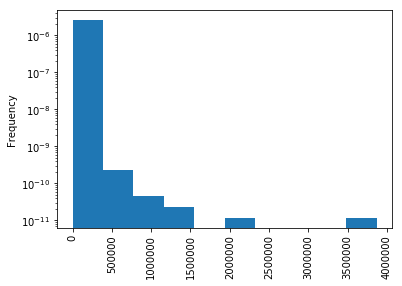

In [33]:
df['nWorkers'].plot(kind='hist',log=True, normed=1)
plt.xticks(rotation='vertical')

In [34]:
df.tail()

,FIPS_state_res,FIPS_co_res,census_MCD_res,FIPS_MSA_res,FIPS_MCD_res,FIPS_state_work,FIPS_co_work,census_MCD_work,FIPS_MSA_work,FIPS_MCD_work,nWorkers,res_name,work_name,State
221393,56,45,NaN,9999,NaN,56,25,NaN,1350,NaN,13,Weston County,Natrona County,WY
221394,56,45,NaN,9999,NaN,56,27,NaN,9999,NaN,16,Weston County,Niobrara County,WY
221395,56,45,NaN,9999,NaN,56,33,NaN,9999,NaN,4,Weston County,Sheridan County,WY
221396,56,45,NaN,9999,NaN,56,37,NaN,9999,NaN,2,Weston County,Sweetwater County,WY
221397,56,45,NaN,9999,NaN,56,45,NaN,9999,NaN,2617,Weston County,Weston County,WY


In [35]:
df_state = df.groupby('State').sum()

In [ ]:
#How many total commuters are there per state?

In [36]:
df_state['nWorkers']

State
AK      263761
AL     1735588
AR      988712
AZ     1600604
CA    13940250
CO     1637440
CT     1673442
DC      304428
DE      334126
FL     5794452
GA     3106393
HI      567765
IA     1322064
ID      440809
IL     5351411
IN     2587182
KS     1178931
KY     1565711
LA     1645690
MA     2979594
MD     2482462
ME      570883
MI     4082403
MN     2158733
MO     2345816
MS     1028014
MT      349184
NC     3300481
ND      293548
NE      775085
NH      566589
NJ     3812684
NM      633135
NV      604609
NY     8220613
OH     4843205
OK     1374338
OR     1294690
PA     5348132
RI      481230
SC     1636356
SD      324122
TN     2239256
TX     7610487
UT      732376
VA     3146858
VT      276765
WA     2302666
WI     2349691
WV      659136
WY      208374
Name: nWorkers, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 <a list of 51 Text xticklabel objects>)

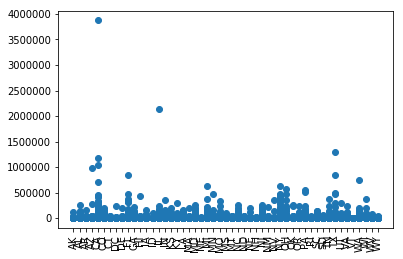

In [37]:
plt.scatter(df['State'],df['nWorkers'])
plt.xticks(rotation='vertical')

In [38]:
states = df['State']

In [39]:
y_pos=np.arange(len(states))

In [40]:
df_state.shape

(51, 11)

In [41]:
df_state.sort_values('nWorkers', inplace = True)

In [42]:
df_state.head()

,FIPS_state_res,FIPS_co_res,census_MCD_res,FIPS_MSA_res,FIPS_MCD_res,FIPS_state_work,FIPS_co_work,census_MCD_work,FIPS_MSA_work,FIPS_MCD_work,nWorkers
State,,,,,,,,,,,
WY,35336,12925,NaN,5250923,NaN,27517,31143,415.0,4854552,222545.0,208374
AK,772,50231,NaN,3138189,NaN,12551,42746,35.0,3100415,16495.0,263761
VT,312250,96333,321988.0,58018509,273781550.0,292330,116169,324124.0,51587302,249049645.0,276765
ND,43054,59349,NaN,9282920,NaN,42112,73121,355.0,9099270,175110.0,293548
DC,2299,209,NaN,1847560,NaN,13467,20076,1250.0,1336892,646995.0,304428


<Container object of 51 artists>

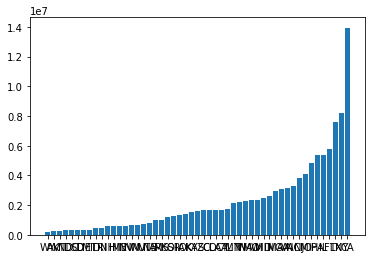

In [43]:
plt.bar(range(df_state.shape[0]), df_state['nWorkers'], tick_label = df_state.index)

In [44]:
#Read in csv file with population information

In [49]:
df_pop = pd.read_csv('counties.csv')

In [50]:
print(df_pop)

       State   FIPS  Year  Population
0         AL   1001  1970       24460
1         AL   1001  1971       25500
2         AL   1001  1972       27200
3         AL   1001  1973       28500
4         AL   1001  1974       29300
5         AL   1001  1975       29700
6         AL   1001  1976       29900
7         AL   1001  1977       30500
8         AL   1001  1978       30900
9         AL   1001  1979       32100
10        AL   1001  1980       32259
11        AL   1001  1981       31985
12        AL   1001  1982       32036
13        AL   1001  1983       32054
14        AL   1001  1984       32134
15        AL   1001  1985       32245
16        AL   1001  1986       32893
17        AL   1001  1987       33268
18        AL   1001  1988       33636
19        AL   1001  1989       33996
20        AL   1001  1990       34356
21        AL   1001  1991       35018
22        AL   1001  1992       36002
23        AL   1001  1993       36976
24        AL   1001  1994       38218
25        AL

In [61]:
pop_group = df_pop.iloc[0::20,:]

In [62]:
print(pop_group)

       State   FIPS  Year  Population
0         AL   1001  1970       24460
20        AL   1001  1990       34356
40        AL   1001  2010       54660
60        AL   1003  1984       86752
80        AL   1003  2004      156266
100       AL   1005  1978       24500
120       AL   1005  1998       26936
140       AL   1007  1972       14100
160       AL   1007  1992       17191
180       AL   1007  2012       22642
200       AL   1009  1986       37995
220       AL   1009  2006       55485
240       AL   1011  1980       10596
260       AL   1011  2000       11581
280       AL   1013  1974       21200
300       AL   1013  1994       21811
320       AL   1013  2014       20276
340       AL   1015  1988      117260
360       AL   1015  2008      117274
380       AL   1017  1982       39336
400       AL   1017  2002       35965
420       AL   1019  1976       18600
440       AL   1019  1996       21281
460       AL   1021  1970       25180
480       AL   1021  1990       32520
500       AL

In [56]:
pop_group.head()

,State,FIPS,Year,Population
0,AL,1001,1970,24460
1,AL,1001,1971,25500
2,AL,1001,1972,27200
3,AL,1001,1973,28500
4,AL,1001,1974,29300
5,AL,1001,1975,29700
6,AL,1001,1976,29900
7,AL,1001,1977,30500
8,AL,1001,1978,30900
9,AL,1001,1979,32100
